# Malnutrition Prediction Model

In [2]:
import pandas as pd
from pandas import read_csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the Dataset

In [4]:
df = pd.read_csv("Malnutrition_risk-2.csv", encoding = 'UTF-8')
df.head()

,Age,Gender,Birth Order,Weight-for-Age,Height-for-Age,Weight-for-Height,Family Size,Parental Education,Household Income (₦),Frequency of Meals,Dietary Diversity,Breastfeeding Duration (months),Access to Healthcare,Clean Water,Sanitation Facilities,Availability of Food,Seasonal Variations,Market Access,Rural Location,Malnutrition Risk
0,0,Female,1,-3.248202,-3.114656,-1.537755,7,Primary,57966,6,6,21,0,1,1,0,0,0,Kisumu,High
1,0,Male,2,-2.070860,-1.380585,-1.399325,9,Tertiary,20834,4,4,11,1,1,1,1,0,1,Narok,Moderate
2,3,Male,1,-1.105947,-0.567713,0.217038,6,Secondary,32686,5,5,11,1,1,1,1,0,1,Narok,Low
3,1,Female,2,-1.525187,-1.110401,-0.762359,7,NaN,28512,5,5,10,1,1,1,0,0,1,Kisumu,Moderate
4,1,Female,1,-3.068086,-1.799964,-0.911071,5,NaN,46199,3,3,12,0,1,1,0,1,1,Siaya,High


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235957 entries, 0 to 235956
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Age                              235957 non-null  int64  
 1   Gender                           235957 non-null  object 
 2   Birth Order                      235957 non-null  int64  
 3   Weight-for-Age                   235957 non-null  float64
 4   Height-for-Age                   235957 non-null  float64
 5   Weight-for-Height                235957 non-null  float64
 6   Family Size                      235957 non-null  int64  
 7   Parental Education               199657 non-null  object 
 8   Household Income (₦)             235957 non-null  int64  
 9   Frequency of Meals               235957 non-null  int64  
 10  Dietary Diversity                235957 non-null  int64  
 11  Breastfeeding Duration (months)  235957 non-null  int64  
 12  Ac

### Change Datatype to suitable ones

In [7]:
df['Gender'] = df['Gender'].astype('string')
df['Parental Education'] = df['Parental Education'].astype('string')
df['Rural Location'] = df['Rural Location'].astype('string')
df['Malnutrition Risk'] = df['Malnutrition Risk'].astype('string')

### Check for Duplicates

In [9]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


### Check for Missing Values

In [11]:
df.isnull().sum()

Age                                    0
Gender                                 0
Birth Order                            0
Weight-for-Age                         0
Height-for-Age                         0
Weight-for-Height                      0
Family Size                            0
Parental Education                 36300
Household Income (₦)                   0
Frequency of Meals                     0
Dietary Diversity                      0
Breastfeeding Duration (months)        0
Access to Healthcare                   0
Clean Water                            0
Sanitation Facilities                  0
Availability of Food                   0
Seasonal Variations                    0
Market Access                          0
Rural Location                         0
Malnutrition Risk                      0
dtype: int64

#### Replace "NaN" in the Parental Education column with "None"

In [13]:
df['Parental Education'] = df['Parental Education'].fillna("None")

In [14]:
df.isnull().sum()

Age                                0
Gender                             0
Birth Order                        0
Weight-for-Age                     0
Height-for-Age                     0
Weight-for-Height                  0
Family Size                        0
Parental Education                 0
Household Income (₦)               0
Frequency of Meals                 0
Dietary Diversity                  0
Breastfeeding Duration (months)    0
Access to Healthcare               0
Clean Water                        0
Sanitation Facilities              0
Availability of Food               0
Seasonal Variations                0
Market Access                      0
Rural Location                     0
Malnutrition Risk                  0
dtype: int64

### Check for Outliers

In [16]:
df.describe()

,Age,Birth Order,Weight-for-Age,Height-for-Age,Weight-for-Height,Family Size,Household Income (₦),Frequency of Meals,Dietary Diversity,Breastfeeding Duration (months),Access to Healthcare,Clean Water,Sanitation Facilities,Availability of Food,Seasonal Variations,Market Access
count,235957.000000,235957.000000,235957.000000,235957.000000,235957.000000,235957.000000,235957.000000,235957.000000,235957.000000,235957.000000,235957.000000,235957.000000,235957.000000,235957.000000,235957.000000,235957.000000
mean,1.529838,2.031476,-1.300347,-1.301433,-0.866075,5.601707,30364.489059,4.033777,4.033777,11.506719,0.665583,0.765555,0.729849,0.667600,0.380548,0.730676
std,1.386206,1.073747,1.306460,1.307942,0.948477,1.850727,14389.842708,2.553822,2.553822,5.764934,0.471787,0.423652,0.444039,0.471074,0.485523,0.443610
min,0.000000,1.000000,-5.210496,-5.090545,-4.279051,3.000000,5000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,-2.388594,-2.391530,-1.594538,4.000000,19947.000000,2.000000,2.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,-1.249432,-1.251342,-0.813187,6.000000,30070.000000,4.000000,4.000000,11.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,2.000000,3.000000,-0.158525,-0.155297,-0.115366,7.000000,40231.000000,5.000000,5.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,5.000000,1.977610,1.972501,2.120059,15.000000,100000.000000,10.000000,10.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Drop Redundant Column

In [18]:
df = df.drop(columns = ['Frequency of Meals'])

In [19]:
df1 = df

#### Encode Categorical Variables

In [21]:
df1['Gender'] = df1['Gender'].map({'Female': 0, 'Male': 1})
df1['Parental Education'] = df1['Parental Education'].map({'None': 0, 'Primary': 1, 'Secondary': 2, 'Tertiary': 3})
df1['Malnutrition Risk'] = df1['Malnutrition Risk'].map({'Low': 0, 'Moderate': 1, 'High': 2})
mapping = dict(enumerate(df['Rural Location'].astype('category').cat.categories))
print(mapping)
df['Rural Location'] = df['Rural Location'].astype('category').cat.codes

df1.head()

{0: 'Bungoma', 1: 'Homa Bay', 2: 'Kakamega', 3: 'Kisumu', 4: 'Migori', 5: 'Narok', 6: 'Siaya'}


,Age,Gender,Birth Order,Weight-for-Age,Height-for-Age,Weight-for-Height,Family Size,Parental Education,Household Income (₦),Dietary Diversity,Breastfeeding Duration (months),Access to Healthcare,Clean Water,Sanitation Facilities,Availability of Food,Seasonal Variations,Market Access,Rural Location,Malnutrition Risk
0,0,0,1,-3.248202,-3.114656,-1.537755,7,1,57966,6,21,0,1,1,0,0,0,3,2
1,0,1,2,-2.070860,-1.380585,-1.399325,9,3,20834,4,11,1,1,1,1,0,1,5,1
2,3,1,1,-1.105947,-0.567713,0.217038,6,2,32686,5,11,1,1,1,1,0,1,5,0
3,1,0,2,-1.525187,-1.110401,-0.762359,7,0,28512,5,10,1,1,1,0,0,1,3,1
4,1,0,1,-3.068086,-1.799964,-0.911071,5,0,46199,3,12,0,1,1,0,1,1,6,2


#### Determine the Correlation between Columns

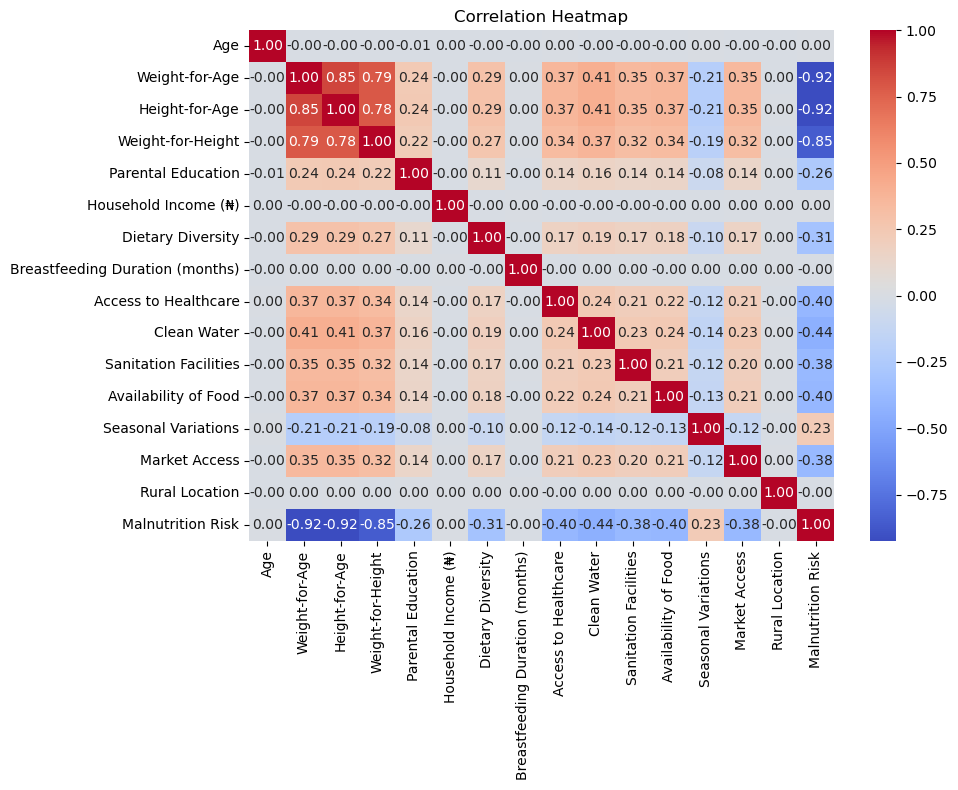

In [23]:
dataplot = df.drop(columns = ['Gender', 'Birth Order', 'Family Size'])

plt.figure(figsize=(10, 8))
sns.heatmap(dataplot.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### Model Training

In [25]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

X = df.drop(columns = ['Malnutrition Risk', 'Gender', 'Birth Order', 'Age', 'Family Size'])
y = df['Malnutrition Risk']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)


clf1 = LogisticRegression(max_iter = 1000)
clf2 = RandomForestClassifier(n_estimators = 100, random_state = 42)
clf3 = XGBClassifier(use_label_encoder = False, eval_metric = 'mlogloss', random_state = 42)
clf4 = KNeighborsClassifier(n_neighbors = 5)


voting_clf = VotingClassifier(
    estimators = [
        ('lr', clf1),
        ('rf', clf2),
        ('xgb', clf3),
        ('knn', clf4)
    ],
    voting = 'hard', 
    n_jobs = -1
)


voting_clf.fit(X_train, y_train)


y_pred = voting_clf.predict(X_test)


print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names = ['Low', 'Moderate', 'High']))

Voting Classifier Accuracy: 0.9910789964400746

Classification Report:
               precision    recall  f1-score   support

         Low       0.99      0.99      0.99     18817
    Moderate       0.99      0.99      0.99     15828
        High       1.00      1.00      1.00     12547

    accuracy                           0.99     47192
   macro avg       0.99      0.99      0.99     47192
weighted avg       0.99      0.99      0.99     47192



### Cross Validation

In [70]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train_fold = X.iloc[train_index]
    X_test_fold = X.iloc[test_index]
    y_train_fold = y.iloc[train_index]
    y_test_fold = y.iloc[test_index]

    voting_clf.fit(X_train_fold, y_train_fold)
    preds = voting_clf.predict(X_test_fold)
    acc = accuracy_score(y_test_fold, preds)
    accuracies.append(acc)

print("Cross-Validation Accuracy Scores:", accuracies)
print("Mean Accuracy:", sum(accuracies)/len(accuracies))

Cross-Validation Accuracy Scores: [0.9888328530259366, 0.9881123919308358, 0.987984997139285, 0.9879638066580492, 0.9876671399207476]
Mean Accuracy: 0.9881122377349708


##### The accuracies of the normal train test split and that of the Kfold are very close, so the model actually performs really well 

#### Baseline Accuracy

In [81]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")

dummy_clf.fit(X_train, y_train)

y_dummy_pred = dummy_clf.predict(X_test)

baseline_accuracy = accuracy_score(y_test, y_dummy_pred)

print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.39873283607391086


### Random Forest Feature Importance

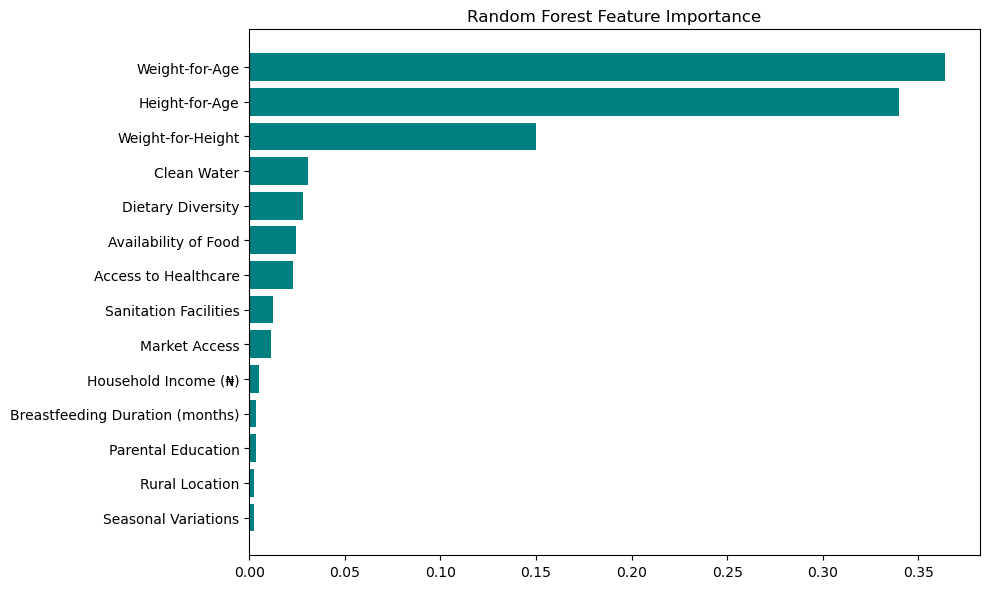

In [28]:
clf2.fit(X_train, y_train)
importances_rf = clf2.feature_importances_
feature_names = X.columns  


rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'], color='teal')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

### XGBoost Feature Importance

C:\Users\Jideofor\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:23:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


<Figure size 1000x600 with 0 Axes>

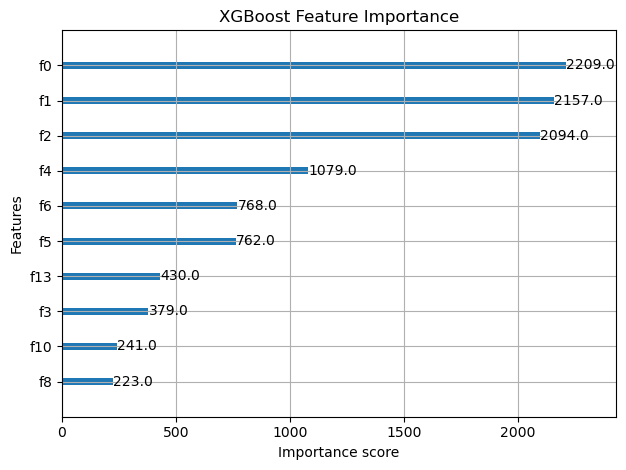

In [30]:
from xgboost import plot_importance


clf3.fit(X_train, y_train)
plt.figure(figsize=(10, 6))
plot_importance(clf3, importance_type='weight', max_num_features=10)
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

### Confusion Matrix

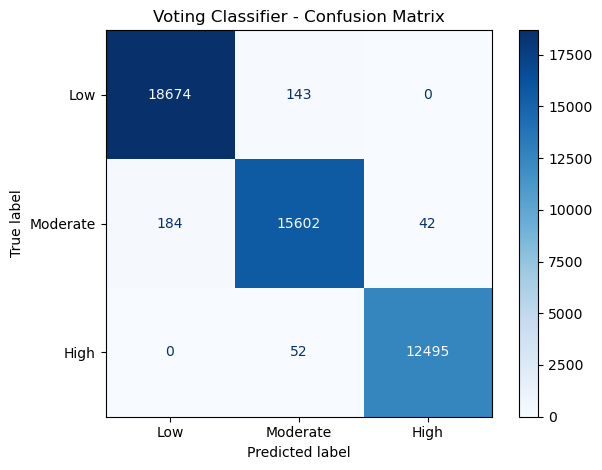

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = voting_clf.predict(X_test) 


cm = confusion_matrix(y_test, y_pred)


display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Moderate', 'High'])
display.plot(cmap='Blues')
plt.title("Voting Classifier - Confusion Matrix")
plt.tight_layout()
plt.show()

In [33]:
X.head(3)

,Weight-for-Age,Height-for-Age,Weight-for-Height,Parental Education,Household Income (₦),Dietary Diversity,Breastfeeding Duration (months),Access to Healthcare,Clean Water,Sanitation Facilities,Availability of Food,Seasonal Variations,Market Access,Rural Location
0,-3.248202,-3.114656,-1.537755,1,57966,6,21,0,1,1,0,0,0,3
1,-2.070860,-1.380585,-1.399325,3,20834,4,11,1,1,1,1,0,1,5
2,-1.105947,-0.567713,0.217038,2,32686,5,11,1,1,1,1,0,1,5


### Model Deployment

#### Make Prediction

In [36]:
input_data = np.array([[-3, -1, -2, 0, 30000, 3, 10, 0, 1, 0, 1, 0, 0, 5]])

prediction = voting_clf.predict(input_data)

print(prediction)

[1]


#### Save the Model

In [38]:
import joblib

In [39]:
filename = "malnutrition_model.pkl.gz"
joblib.dump(voting_clf, filename, compress = 3)

['malnutrition_model.pkl.gz']

#### Load the Model

In [41]:
malnutrition_loaded_model = joblib.load(filename)